# Steady-state BVP from heat conduction

Consider solving
$$
 \begin{cases}- u_{xx}(x) = g(x),\\
 u(0) = \alpha,\\
 u(1) = \beta.
 \end{cases}
$$

In [3]:
using LinearAlgebra, Plots, LaTeXStrings

In [2]:
m = 49; # number of interior grid points
h = 1/(m+1); # grid spacing
κ = 1.0;
xs = h:h:1-h

0.02:0.02:0.98

In [3]:
A = SymTridiagonal(fill(2.0,m),fill(-1.0,m-1));
L = A/h^2;

A solution to compare against.  Consider $u(x) = \cos(k \pi x) \exp(-x^2)$.  Then it follows that

\begin{align*}
    -u_{xx}(x) = g(x), \quad g(x) = \left[ 4 \pi  k x \sin (\pi  k x)-\left(\pi ^2 k^2-4 x^2+2\right) \cos (\pi  k x) \right] \exp(-x^2).
\end{align*}

We can also solve for $\alpha$ and $\beta$ as following
$$
    u(0) = \alpha = 1
$$
$$
    u(1) = \beta = \cos(k \pi)\exp(-1)
$$

In [4]:
k = 1
g = x -> -exp(-x^2)*(4*pi*k*x*sin(pi*k*x) - (pi^2*k^2 - 4*x^2 + 2)*cos(pi*k*x))
u = x -> cos(k*pi*x)*exp(-x^2)

#11 (generic function with 1 method)

In [5]:
b = map(g,xs)
U = L\b
utrue = map(u,xs);

In [6]:
maximum(abs.(U-utrue))

0.9726340836742878

## Setup function to test convergence

In [18]:
function solve_DE(m,k) #take k as a new argument
    h = 1/(m+1); # grid spacing
    κ = 1.0;
    g = x -> -exp(-x^2)*(4*pi*k*x*sin(pi*k*x) - (pi^2*k^2 - 4*x^2 + 2)*cos(pi*k*x)) #define the function g depending on k
    u = x -> cos(k*pi*x)*exp(-x^2) #define u depending on k
    xs = h:h:1-h
    A = SymTridiagonal(fill(2.0,m),fill(-1.0,m-1));
    L = A/h^2;
    b = map(g,xs)
    b[1] += (κ*u(0))/h^2 #add on the inital conditions u(0)
    b[end] += (κ*u(1))/h^2 #add on the inital conditions u(1)
    U = L\b
    utrue = map(u,xs)
    maximum(abs.(U-utrue))
end

solve_DE (generic function with 1 method)

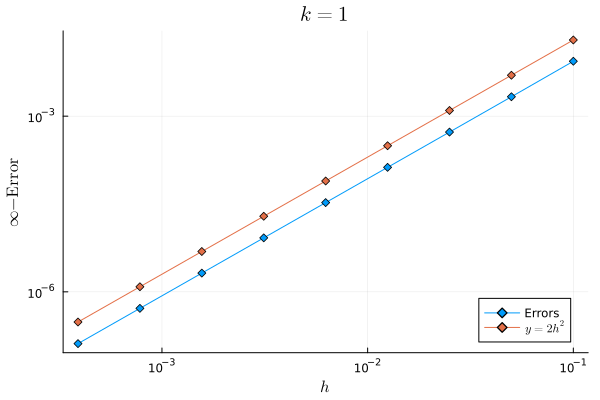

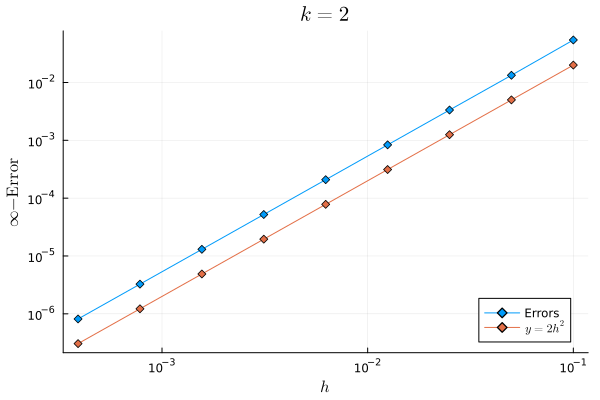

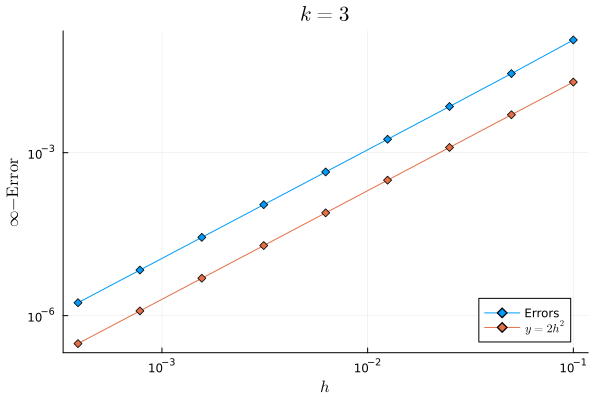

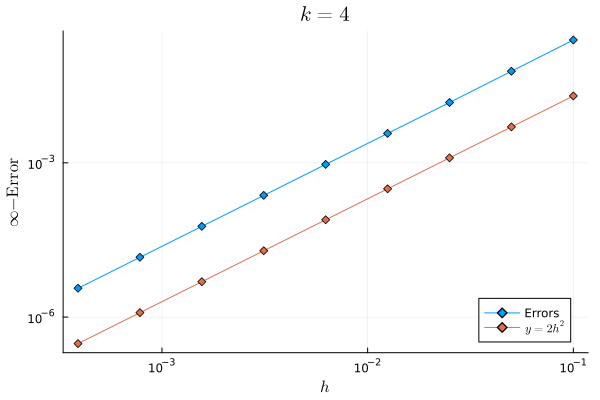

In [24]:
for k=1:4
    m = 10;
    errs = [solve_DE(m*2^j-1,k) for j = 0:1:8]
    hs = [1/(m*2^j) for j = 0:1:8]
    plot(hs,errs,yaxis=:log,xaxis=:log,label="Errors",markershape=:diamond,legend =:bottomright)
    display(plot!(hs,2hs.^2,title=L"k=%$k",label=L"y = 2h^2",xlabel = L"h",ylabel = L"\infty\mathrm{-Error}",markershape=:diamond))
    savefig(string(k)*"a1.png")
end
    

## Smoothness of solutions

Consider $u(x) = x(x-1) |x-1/2|^2 \mathrm{sgn}(x-1/2)$.  Then

\begin{align*}
    -u_{xx}(x) = g(x), \quad g(x) = 
    \begin{cases}
        \frac{5}{2} - 12 x + 12 x^2 & x > 1/2,\\
        -\frac{5}{2} + 12 x - 12 x^2 & x \leq 1/2.
    \end{cases}
\end{align*}

In [ ]:
k = 1
p = x -> 5/2 - 12*x + 12*x^2
g = x -> x > 1/2 ? -p(x) : p(x)
u = x -> x*(x-1)*abs(x-0.5)^2*sign(x-0.5)

In [ ]:
function solve_DE(m)
    h = 1/(m+1); # grid spacing
    κ = 1.0;
    xs = h:h:1-h
    A = SymTridiagonal(fill(2.0,m),fill(-1.0,m-1));
    L = A/h^2;
    b = map(g,xs)
    U = L\b
    utrue = map(u,xs)
    maximum(abs.(U-utrue))
end

In [ ]:
m = 10;
errs = [solve_DE(m*2^j-1) for j = 0:1:8]
hs = [1/(m*2^j) for j = 0:1:8]
plot(hs,errs,yaxis=:log,xaxis=:log,label="Errors",markershape=:diamond,legend =:bottomright)
plot!(hs,hs.^2,label=L"y = h^2",xlabel = L"h",ylabel = L"\infty\mathrm{-Error}",markershape=:diamond)
    

# Higher-order methods

In [2]:
using FiniteDifferences, SparseArrays

In [4]:
method = FiniteDifferenceMethod([-2,-1, 0, 1,2], 2)
display(method)
interior = method.coefs |> Vector

FiniteDifferenceMethod:
  order of method:       5
  order of derivative:   2
  grid:                  [-2, -1, 0, 1, 2]
  coefficients:          [-0.08333333333333333, 1.3333333333333333, -2.5, 1.3333333333333333, -0.08333333333333333]


5-element Vector{Float64}:
 -0.08333333333333333
  1.3333333333333333
 -2.5
  1.3333333333333333
 -0.08333333333333333

In [5]:
method = FiniteDifferenceMethod([-1,0,1,2,3], 2)
display(method)
left = method.coefs |> Vector;

FiniteDifferenceMethod:
  order of method:       5
  order of derivative:   2
  grid:                  [-1, 0, 1, 2, 3]
  coefficients:          [0.9166666666666666, -1.6666666666666667, 0.5, 0.3333333333333333, -0.08333333333333333]


In [6]:
method = FiniteDifferenceMethod([-3,-2,-1,0,1], 2)
display(method)
right = method.coefs |> Vector;

FiniteDifferenceMethod:
  order of method:       5
  order of derivative:   2
  grid:                  [-3, -2, -1, 0, 1]
  coefficients:          [-0.08333333333333333, 0.3333333333333333, 0.5, -1.6666666666666667, 0.9166666666666666]


In [7]:
m = 49; # number of interior grid points
h = 1/(m+1); # grid spacing
κ = 1.0;
xs = h:h:1-h

0.02:0.02:0.98

In [8]:
L = spzeros(m,m);
L[1,1:4] = left[2:end]
L[2,1:4] = interior[2:end]
L[end,end-3:end] = right[1:end-1]
L[end-1,end-3:end] = interior[1:end-1]
for i = 3:m-2
    L[i,i-2:i+2] = interior
end
L *= -κ/h^2

49×49 SparseMatrixCSC{Float64, Int64} with 241 stored entries:
⢿⣿⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠙⢿⣷⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠙⢿⣷⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠙⢿⣷⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠙⢿⣷⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⢿⣷⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⢿⣷⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⢿⣷⣄⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⢿⣷⣄⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⢿⣷⣄⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⢿⣷⣄⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⢿⣷⡄
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠉⠁

In [9]:
k = 1
g = x -> -exp(-x^2)*(4*pi*k*x*sin(pi*k*x) - (pi^2*k^2 - 4*x^2 + 2)*cos(pi*k*x)) 
u = x -> cos(k*pi*x)*exp(-x^2) 

#11 (generic function with 1 method)

In [10]:
b = map(g,xs)
U = L\b
utrue = map(u,xs);

In [11]:
U - utrue

49-element Vector{Float64}:
 -0.9726423498545937
 -0.9452847532429446
 -0.9179271641821006
 -0.8905695792504468
 -0.8632119980380069
 -0.8358544203092981
 -0.808496845802628
 -0.7811392742192285
 -0.7537817052265096
 -0.7264241384627518
  ⋮
  0.12166104276190848
  0.14901866382070028
  0.1763762852644003
  0.20373390682082707
  0.23109152822897722
  0.25844914923862505
  0.28580676956604756
  0.31316438824313075
  0.340521994522159

In [13]:
function solve_DE_HO(m,k)
    h = 1/(m+1); # grid spacing
    κ = 1.0;
    xs = h:h:1-h
    g = x -> -exp(-x^2)*(4*pi*k*x*sin(pi*k*x) - (pi^2*k^2 - 4*x^2 + 2)*cos(pi*k*x)) #define the function g depending on k
    u = x -> cos(k*pi*x)*exp(-x^2) #define u depending on k

    L = spzeros(m,m);
    L[1,1:4] = left[2:end]
    L[2,1:4] = interior[2:end]
    L[end,end-3:end] = right[1:end-1]
    L[end-1,end-3:end] = interior[1:end-1]
    for i = 3:m-2
        L[i,i-2:i+2] = interior
    end
    L *= -κ/h^2

    
    b = map(g,xs)
    b[1] += left[1] * (κ*u(0))/h^2 #add on the inital conditions u(0)
    b[2] += interior[1] * (κ*u(0))/h^2 #add on the inital conditions u(0)
    b[end-1] += interior[end] * (κ*u(1))/h^2 #add on the inital conditions u(1)
    b[end] += right[end] * (κ*u(1))/h^2 #add on the inital conditions u(1)
    U = L\b
    utrue = map(u,xs)
    maximum(abs.(U-utrue))
end

solve_DE_HO (generic function with 1 method)

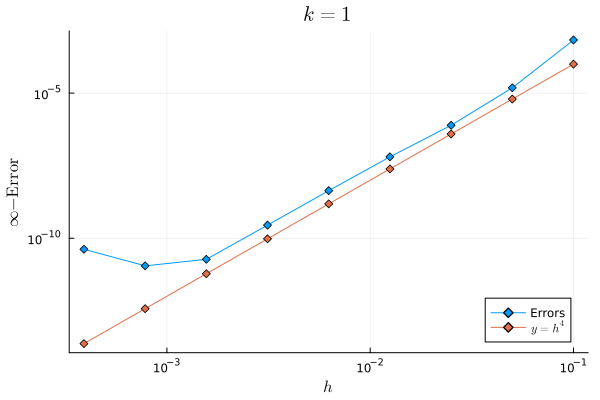

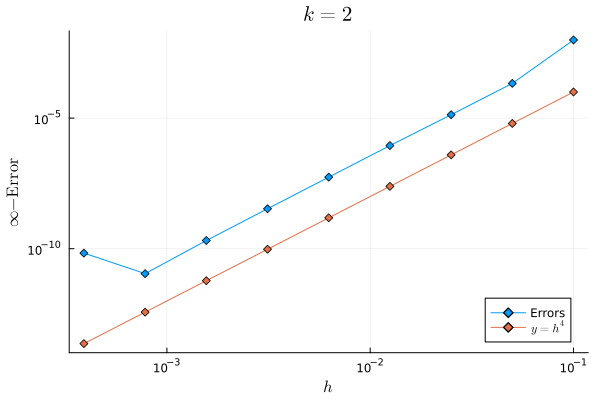

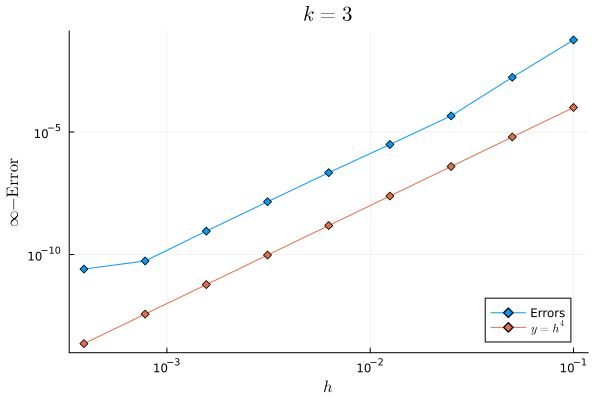

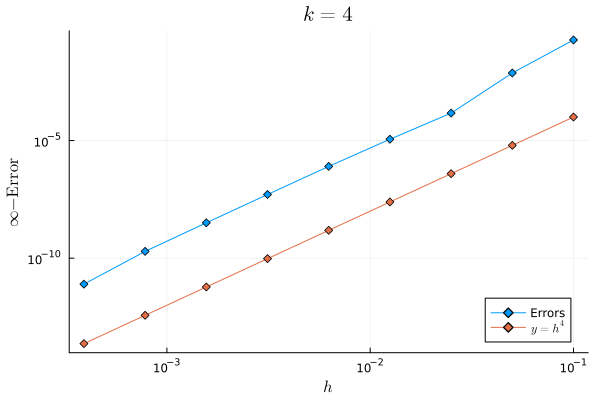

In [25]:
for k=1:4
    m = 10;
    errs = [solve_DE_HO(m*2^j-1,k) for j = 0:1:8]
    hs = [1/(m*2^j) for j = 0:1:8]
    plot(hs,errs,yaxis=:log,xaxis=:log,title=k,label="Errors",markershape=:diamond,legend =:bottomright)
    display(plot!(hs,hs.^4,title=L"k=%$k",label=L"y = h^4",xlabel = L"h",ylabel = L"\infty\mathrm{-Error}",markershape=:diamond))
    savefig(string(k)*"b1.png")
end